# Detection of a Quantum Biscuit with Qiskit

# 1. Initial Experiment
In the experiment we have a specific area, in which there could be a quantum biscuit (marked by a red rectangle). If a single photon touches the biscuit, the biscuit is ruined.
We want to find out, whether we have a biscuit in this specific area or not without ruining a potential biscuit.

We start by sending a photon (yellow arrow) as a macroscopic object to the first beamsplitter (blue line).
In this experiment there are two mirrors (the black lines), another beamsplitter (the second blue line) and two detectors D1 and D2 (the silver trapezes).


<img src="new_Images/initial_2022-04-18 104718.png" width=400/>

## Biscuit tester without biscuit

To find out whether we have a biscuit in the
specified area, we first look at the case, where
there is no biscuit. In this case we send a photon
with a beamsplitter in a superposition, where
the photon takes the way up − right and right −
up at the same time.
After being reflected by mirrors, the two superpositions of the photon collapse into a macroscopic photon object, which goes to the right
side. Now the photon is detected by D1. [9]
The yellow arrow indicates a photon in case it
is an object, in case of a wave the arrow is lightblue.


<img src="new_Images/No-bomb_2022-04-18.png" width=400/>




## Biscuit tester with biscuit

Now we do the exact same thing, but we put a biscuit in the specified area (the biscuit
is represented by the blue dot). The photon is now in a superposition, until it reaches
the biscuit. When the wave photon reaches the biscuit, we have a measurement. As
a result of the measurement, the superposition of the photon collapses. The photon
either takes the up − right or right − up way. Lets first look at the case, where the
photon decides to take the way, in which the biscuit is (up − right). The biscuit is
ruined and the photon reaches neither the detector D1 or D2.

<img src="new_Images/bomb_before_reached_2022-04-18.png" width=400 height=400 />
<img src="new_Images/a_bomb_detected_2022-04-18 104423.png" width=400 height=400 />

If the photon takes the other way, we have it as a particle between the first and second
beamsplitter. When the photon reaches the second beamsplitter as a particle, it is again
brought in a superposition. In this case, we can either measure it in D1 or D2.

<img src="new_Images/a_bomb_but_no_detection_d2_d1_2022-04-18.png" width=400 height=400 />
<img src="new_Images/a_bomb_but_no_detection_d1_2022-04-18.png" width=400 height=400 />
<img src="new_Images/a_bomb_but_no_detection_d2_2022-04-18.png" width=400 height=400 />

## Result of the initial experiment

According to [9] there are three possible outcomes of this measurement:
1. no detector clicks, the biscuit is ruined
2. detector D1 clicks, there is a biscuit which is not yet ruined or there is no biscuit
3. detector D2 clicks, there is a biscuit, which is not yet ruined.

# Bomb tester with bomb with hadamad gate
Now, we have simulated this in qiskit in reference to [10]. q (later q0) represents the
photon. We initially use Hadamard gates as beamsplitter. This makes sense, since a
beamsplitter makes a qubit go from the states 0 or 1 to a superposition of 1 and 0 and
in the other direction.

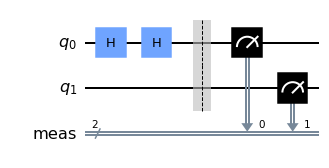

In [137]:
# Code for the basic bomb tester circuit

from qiskit import QuantumCircuit
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram

bomb_tester_without_bomb = QuantumCircuit(2)
bomb_tester_without_bomb.h(0)

bomb_tester_without_bomb.h(0)
# bomb_tester_without_bomb.z(0)
bomb_tester_without_bomb.measure_all()
bomb_tester_without_bomb.draw(output='mpl')
# Running the basic bomb tester circuit

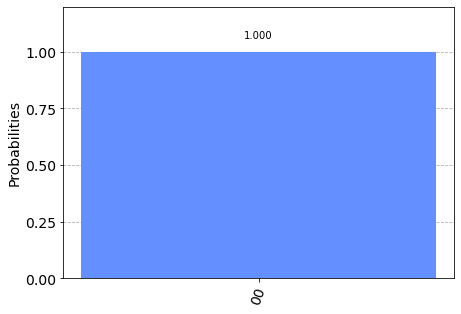

In [138]:
simulator = QasmSimulator()

job = simulator.run(bomb_tester_without_bomb, shots=1000)
result = job.result()
counts = result.get_counts(bomb_tester_without_bomb)


plot_histogram(counts)

We get as result 100% probability for the state $$ |00\rangle $$
This is logical, because we have the inputs $$ |00\rangle $$ of qo and q1 combined.

$$ (H ⨂ I ) (H ⨂ I ) |00\rangle=\frac 1 {\sqrt{2}} \begin{pmatrix} 1 & 0 & 1 & 0 \\ 0 & 1 & 0 & 1 \\ 1 & 0 & -1 & 0 \\ 0 & 1 & 0 & -1\end{pmatrix}  \frac 1 {\sqrt{2}} \begin{pmatrix} 1 & 0 & 1 & 0 \\ 0 & 1 & 0 & 1 \\ 1 & 0 & -1 & 0 \\ 0 & 1 & 0 & -1\end{pmatrix}  \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0\end{pmatrix} = \frac 1 {2} \begin{pmatrix} 1 & 0 & 1 & 0 \\ 0 & 1 & 0 & 1 \\ 1 & 0 & -1 & 0 \\ 0 & 1 & 0 & -1\end{pmatrix} \begin{pmatrix} 1 \\ 0 \\ 1 \\ 0\end{pmatrix} = \frac 1 {2} \begin{pmatrix} 2 \\ 0 \\ 0 \\ 0\end{pmatrix} = \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0\end{pmatrix} = |00\rangle $$

As described earlier in the experiment we only get zero as a result.
Now we add a measurement in the experiment to represent the biscuit. We now mea-
sure both 1 and 0 with the same possibility. But don’t yet know, if the biscuit is ruined.

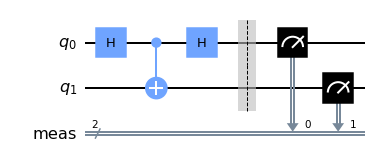

In [139]:
# Code for the basic bomb tester circuit

from qiskit import QuantumCircuit
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram

bomb_tester_with_bomb = QuantumCircuit(2)
bomb_tester_with_bomb.h(0)
bomb_tester_with_bomb.cx(0, 1)
bomb_tester_with_bomb.h(0)
# bomb_tester_with_bomb.z(0)
bomb_tester_with_bomb.measure_all()
bomb_tester_with_bomb.draw(output='mpl')

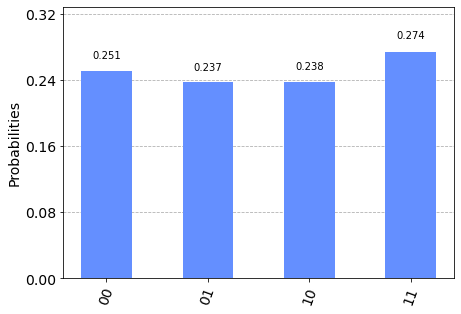

In [140]:
# Running the basic bomb tester circuit
simulator = QasmSimulator()

job = simulator.run(bomb_tester_with_bomb, shots=1000)
result = job.result()
counts = result.get_counts(bomb_tester_with_bomb)


plot_histogram(counts)

The following calcualtion shows, why we have the result.

$$ (H ⨂ I ) CX (H ⨂ I ) |00\rangle = (H ⨂ I ) CX  \frac 1 {\sqrt{2}} \begin{pmatrix} 1 & 0 & 1 & 0 \\ 0 & 1 & 0 & 1 \\ 1 & 0 & -1 & 0 \\ 0 & 1 & 0 & -1\end{pmatrix}  \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0\end{pmatrix} = $$

$$(H ⨂ I ) CX \frac 1 {\sqrt{2}} \begin{pmatrix} 1 & 0 & 1 & 0 \\ 0 & 1 & 0 & 1 \\ 1 & 0 & -1 & 0 \\ 0 & 1 & 0 & -1\end{pmatrix} \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0\end{pmatrix}$$

$$ = (H ⨂ I ) CX \frac 1 {\sqrt{2}} \begin{pmatrix} 1 \\ 0 \\ 1 \\ 0\end{pmatrix} = (H ⨂ I ) \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0\end{pmatrix} \frac 1 {\sqrt{2}} \begin{pmatrix} 1 \\ 0 \\ 1 \\ 0\end{pmatrix}  = (H ⨂ I ) \frac 1 {\sqrt{2}} \begin{pmatrix} 1 \\ 0 \\ 0 \\ 1\end{pmatrix} $$

$$ = \frac 1 {\sqrt{2}} \begin{pmatrix} 1 & 0 & 1 & 0 \\ 0 & 1 & 0 & 1 \\ 1 & 0 & -1 & 0 \\ 0 & 1 & 0 & -1\end{pmatrix} \frac 1 {\sqrt{2}} \begin{pmatrix} 1 \\ 0 \\ 0 \\ 1\end{pmatrix}  = \frac 1 {2} \begin{pmatrix} 1 \\ 1 \\ 1 \\ -1\end{pmatrix} $$

To imitate, whether the biscuit is ruined or not, we add another qubit and a CNOT gate.
q0 is represented by the right output number
q1 is represented by the left output number
In the yellow marked area are the probabilities, that
the biscuit is ruined. As a result in
1. 50% of the cases the biscuit is ruined
2. 25% of the cases the biscuit is found without it
being ruined
3. 25% of the cases there is no information whether
the biscuit is found or not
The goal is now to lower the probability of the biscuit
being ruined. Therefore we want to turn the photon with the first beamsplitter in a
superposition, where it is more likely for the photon to take the way without a biscuit,
if exists a biscuit

In [141]:
# In this case bring a photon with a beamsplitter (blue object) in a superposition, where the photon takes the way up-right and right-up at the next time.
# After being reflected by mirrors (black objects), the both superpositions of the photon are collapsed into a photon object, which goes up.
#
# The color yellow is used for a photon, in case it is a object, light-blue if it is a wave.
#
# Now, we have simulated this in qiskit:
#
# Here q0 represents the photon.


In [142]:
# First of all, we can say, that we have a big difference, in case we have a biscuit or not:
#
# If we have a biscuit, we have the following result:
# $$ \frac 1 {2} \begin{pmatrix} 1 \\ 1 \\ 1 \\ -1\end{pmatrix} $$
#
# If we don't have a biscuit, we have the following result:
# $$  \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0\end{pmatrix} $$
#
#
# We can now see a different result, if we have a biscuit or not.
#
# The problem now is, that in 50% of the cases if we have a biscuit, we destroy it.


In [143]:
#!pip3 install qiskit
#!pip3 install pylatexenc
#!pip3 install matplotlib
#!pip3 install RISE

In [144]:
# The experiment proposes in the following if no bomb exists
#
# We would have one photon outcome which not in a superposition, so it is either $$ |0\rangle $$ or $$ |1\rangle $$.
#
# But if there is a bomb  we have the CNOT gate. This represents a measurement process in between the Hadamad gates.
#
# So the photon is either $$ |0\rangle $$ or $$ |1\rangle $$ before between the hadamad gates. So we have as a final
# We represent the photon as q0.


In [145]:
# Bomb tester without bomb

In [146]:
# Code for the basic bomb tester circuit

# from qiskit import QuantumCircuit
# from qiskit.providers.aer import QasmSimulator
# from qiskit.visualization import plot_histogram
#
# bomb_tester_without_bomb = QuantumCircuit(2)
# bomb_tester_without_bomb.h(0)
#
# bomb_tester_without_bomb.h(0)
# # bomb_tester_without_bomb.z(0)
# bomb_tester_without_bomb.measure_all()
# bomb_tester_without_bomb.draw(output='mpl')
# # Running the basic bomb tester circuit
#
#
#
# simulator = QasmSimulator()
#
# job = simulator.run(bomb_tester_without_bomb, shots=1000)
# result = job.result()
# counts = result.get_counts(bomb_tester_without_bomb)
#
#
# plot_histogram(counts)

In [147]:
# Critical analysis of initial experiment:
#
# In an initial implementation of the quantum bomb tester by Maria Violaris, she uses two Qbit. The qubit q0 represents the photon, which is brought to a superposition via a Hadamad Gate.
# The qubit q1 represents the bomb.
# After that,  she uses a cnot gate, to flip q1 to 1 which means the bomb has exploded.
# The state of q0 represents, whether the algorithm thinks, that there does a bomb exist (1) or not (0).
#
# If there would be no quantum bomb, the photon follow the following operation:
#
# $$ (H ⨂ I ) (H ⨂ I ) |00\rangle=\frac 1 {\sqrt{2}} \begin{pmatrix} 1 & 0 & 1 & 0 \\ 0 & 1 & 0 & 1 \\ 1 & 0 & -1 & 0 \\ 0 & 1 & 0 & -1\end{pmatrix}  \frac 1 {\sqrt{2}} \begin{pmatrix} 1 & 0 & 1 & 0 \\ 0 & 1 & 0 & 1 \\ 1 & 0 & -1 & 0 \\ 0 & 1 & 0 & -1\end{pmatrix}  \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0\end{pmatrix} = \frac 1 {2} \begin{pmatrix} 1 & 0 & 1 & 0 \\ 0 & 1 & 0 & 1 \\ 1 & 0 & -1 & 0 \\ 0 & 1 & 0 & -1\end{pmatrix} \begin{pmatrix} 1 \\ 0 \\ 1 \\ 0\end{pmatrix} = \frac 1 {2} \begin{pmatrix} 2 \\ 0 \\ 0 \\ 0\end{pmatrix} = \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0\end{pmatrix} = |00\rangle $$
#
# Now we have a bomb which is represented by a CNOT Gate.
#
# $$ (H ⨂ I ) CX (H ⨂ I ) |00\rangle = (H ⨂ I ) CX  \frac 1 {\sqrt{2}} \begin{pmatrix} 1 & 0 & 1 & 0 \\ 0 & 1 & 0 & 1 \\ 1 & 0 & -1 & 0 \\ 0 & 1 & 0 & -1\end{pmatrix}  \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0\end{pmatrix} = $$
#
# $$(H ⨂ I ) CX \frac 1 {\sqrt{2}} \begin{pmatrix} 1 & 0 & 1 & 0 \\ 0 & 1 & 0 & 1 \\ 1 & 0 & -1 & 0 \\ 0 & 1 & 0 & -1\end{pmatrix} \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0\end{pmatrix}$$
#
# $$ = (H ⨂ I ) CX \frac 1 {\sqrt{2}} \begin{pmatrix} 1 \\ 0 \\ 1 \\ 0\end{pmatrix} = (H ⨂ I ) \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0\end{pmatrix} \frac 1 {\sqrt{2}} \begin{pmatrix} 1 \\ 0 \\ 1 \\ 0\end{pmatrix}  = (H ⨂ I ) \frac 1 {\sqrt{2}} \begin{pmatrix} 1 \\ 0 \\ 0 \\ 1\end{pmatrix} $$
#
# $$ = \frac 1 {\sqrt{2}} \begin{pmatrix} 1 & 0 & 1 & 0 \\ 0 & 1 & 0 & 1 \\ 1 & 0 & -1 & 0 \\ 0 & 1 & 0 & -1\end{pmatrix} \frac 1 {\sqrt{2}} \begin{pmatrix} 1 \\ 0 \\ 0 \\ 1\end{pmatrix}  = \frac 1 {2} \begin{pmatrix} 1 \\ 1 \\ 1 \\ -1\end{pmatrix} $$
#
# The
#
#
#
#
#
#
#
#
# COMMENT
#
# $$a = H|0\rangle=\frac 1 {\sqrt{2}} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \frac 1 {\sqrt{2}} \begin{pmatrix} 1 \\ 1 \end{pmatrix} $$
#
# Now there are two possibilities,
#
#


In [148]:
# Critical analysis of initial experiment:
#
# In an initial implementation of the quantum bomb tester by Maria Violaris, she uses two Qbit. The qubit q0 represents the photon, which is brought to a superposition via a Hadamad Gate.
# The qubit q1 represents the bomb.
# After that,  she uses a cnot gate, to flip q1 to 1 which means the bomb has exploded.
# The state of q0 represents, whether the algorithm thinks, that there does a bomb exist (1) or not (0).
#
# If there would be no quantum bomb, the photon follow the following operation:
#
# $$ (H ⨂ I ) (H ⨂ I ) |00\rangle=\frac 1 {\sqrt{2}} \begin{pmatrix} 1 & 0 & 1 & 0 \\ 0 & 1 & 0 & 1 \\ 1 & 0 & -1 & 0 \\ 0 & 1 & 0 & -1\end{pmatrix}  \frac 1 {\sqrt{2}} \begin{pmatrix} 1 & 0 & 1 & 0 \\ 0 & 1 & 0 & 1 \\ 1 & 0 & -1 & 0 \\ 0 & 1 & 0 & -1\end{pmatrix}  \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0\end{pmatrix} = \frac 1 {2} \begin{pmatrix} 1 & 0 & 1 & 0 \\ 0 & 1 & 0 & 1 \\ 1 & 0 & -1 & 0 \\ 0 & 1 & 0 & -1\end{pmatrix} \begin{pmatrix} 1 \\ 0 \\ 1 \\ 0\end{pmatrix} = \frac 1 {2} \begin{pmatrix} 2 \\ 0 \\ 0 \\ 0\end{pmatrix} = \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0\end{pmatrix} = |00\rangle$$
#
# Now we have a bomb which is represented by a CNOT Gate.
#
# $$ (H ⨂ I ) CX (H ⨂ I ) |00\rangle = (H ⨂ I ) CX  \frac 1 {\sqrt{2}} \begin{pmatrix} 1 & 0 & 1 & 0 \\ 0 & 1 & 0 & 1 \\ 1 & 0 & -1 & 0 \\ 0 & 1 & 0 & -1\end{pmatrix}  \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0\end{pmatrix} = $$
#
# $$(H ⨂ I ) CX \frac 1 {\sqrt{2}} \begin{pmatrix} 1 & 0 & 1 & 0 \\ 0 & 1 & 0 & 1 \\ 1 & 0 & -1 & 0 \\ 0 & 1 & 0 & -1\end{pmatrix} \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0\end{pmatrix}$$
#
# $$ = (H ⨂ I ) CX \frac 1 {\sqrt{2}} \begin{pmatrix} 1 \\ 0 \\ 1 \\ 0\end{pmatrix} = (H ⨂ I ) \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0\end{pmatrix} \frac 1 {\sqrt{2}} \begin{pmatrix} 1 \\ 0 \\ 1 \\ 0\end{pmatrix}  = (H ⨂ I ) \frac 1 {\sqrt{2}} \begin{pmatrix} 1 \\ 0 \\ 0 \\ 1\end{pmatrix} $$
#
# $$ = \frac 1 {\sqrt{2}} \begin{pmatrix} 1 & 0 & 1 & 0 \\ 0 & 1 & 0 & 1 \\ 1 & 0 & -1 & 0 \\ 0 & 1 & 0 & -1\end{pmatrix} \frac 1 {\sqrt{2}} \begin{pmatrix} 1 \\ 0 \\ 0 \\ 1\end{pmatrix}  = \frac 1 {2} \begin{pmatrix} 1 \\ 1 \\ 1 \\ -1\end{pmatrix} $$
#
# The
#
#
#
#
#
#
#
#
# COMMENT
#
# $$a = H|0\rangle=\frac 1 {\sqrt{2}} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \frac 1 {\sqrt{2}} \begin{pmatrix} 1 \\ 1 \end{pmatrix} $$
#
# Now there are two possibilities,




# Code for the basic bomb tester circuit

from qiskit import QuantumCircuit

bomb_tester = QuantumCircuit(2)
bomb_tester.h(0)
bomb_tester.cx(0, 1)
bomb_tester.h(0)
bomb_tester.measure_all()
bomb_tester.draw(output='mpl')


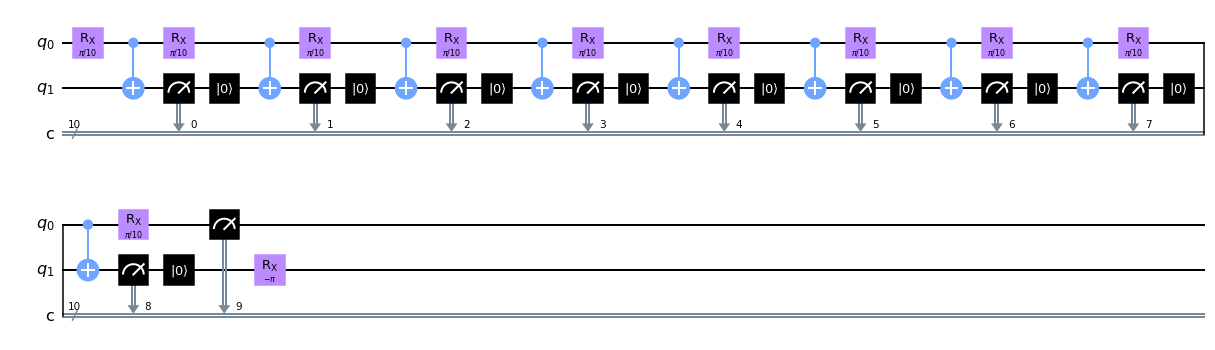

In [149]:
from qiskit.circuit import QuantumRegister, ClassicalRegister
import numpy as np
from qiskit.circuit.library import RXGate, RYGate

from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram

simulator = QasmSimulator()



cycles = 10 # Choose the number of times we want to pass our photon through the mystery box. The more, the better.
theta = np.pi/cycles # The correct reflectivity of our beamsplitter is chosen for the quantum Zeno effect to work.

# Create our quantum circuit
qr = QuantumRegister(2, 'q')
cr = ClassicalRegister(cycles, 'c')
zeno_tester = QuantumCircuit(qr, cr)

# Create a chain of our variable beamsplitters and C-NOT bombs
for cycle in range(cycles-1):
    zeno_tester.append(RXGate(theta), [qr[0]])
    zeno_tester.cx(0, 1)
    zeno_tester.measure(qr[1],cr[cycle])
    zeno_tester.reset(qr[1])

# Add a final beamsplitter
zeno_tester.append(RXGate(theta), [qr[0]])
zeno_tester.append(RXGate(-np.pi), [qr[1]])

#Measure our photon to predict whether there is a bomb, and measure our bomb qubit to see if it exploded.
zeno_tester.measure(qr[0],cr[cycles-1])
zeno_tester.draw(output='mpl')


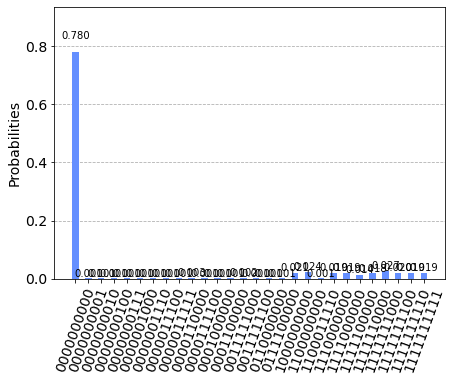

In [150]:
# Running the Zeno bomb tester

zeno_job = simulator.run(zeno_tester, shots=1000)
zeno_result = zeno_job.result()
zeno_counts = zeno_result.get_counts(zeno_tester)

plot_histogram(zeno_counts)